# Módulos
**Autores**: Rogelio Mazaeda Echevarría, Félix Miguel Trespaderne.  

## Contenidos
[Introducción](#Introducción)<br>
[Módulos](#Módulos)<br>
[Espacio de nombres ("**namespace**")](#Espacio_de_nombres)<br>
[Importación de módulos](#Importación)<br>
[Ejemplo de módulo](#Ejemplo)<br>
[Programa vs. módulo](#Diferencias)<br>
[Tests unitarios ("**unit_tests**")](#Unit_tests)<br>
[Biblioteca estándar](#Biblioteca)<br>

***
<a id='Introducción'></a>

## Introducción

Desde el mismo inicio del curso hemos estado utilizando las funciones de Python distribuidas en módulos de la librería estándar del lenguajes. En particular hemos utilizado las funciones del módulo **math** siguiendo el procedimiento que consiste en importar el módulo, de forma que los **valores** (ej: ```math.pi```) y **funciones** (ej: ```math.cos()```, que están definidos en el mismo, estén desde a partir de ese momento disponibles para su uso en nuestro programa o guión.

In [ ]:
import math

print('cos (Pi) = ', math.cos(math.pi))

En este cuaderno vamos a comprender mejor:

- el mecanismo que se utiliza para _incorporar_ estas funciones y valores a nuestro programa.
- la naturaleza de estos módulos.
- el concepto de espacio de nombres.
- cómo crear un módulo sencillo.
- cómo documentar nuestro módulos.
- cómo hacer módulos que hagan explícita la forma de *testearlos* (_unit tests_).
- diferencia (y similitudes) entre el programa principal y un módulo de librería.

Adicionalmente:
- Se hará un recorrido muy rápido por los principales módulos de la **librería estándar**.
- Se darán nociones del concepto de **paquete** ("*package*") y se mencionarán algunos paquetes importantes provistos por terceros.

***
<a id='Módulos'></a>

## Módulos

### ¿Qué es un módulo?

Un **módulo** es un **fichero**, accesible al intérprete de Python, ejecutable por el **núcleo** de Python y que puede contener:

- Variables globales, funciones,  clases (patrones de objetos) y sentencias ejecutables.
- Un módulo, a su vez, puede _importar_ otros módulos. 

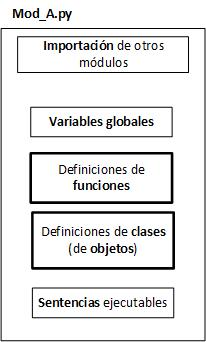

### Pero entonces ¿Qué diferencia hay entre los módulos y el programa principal?

En lo que que concierne exclusivamente a la **sintaxis** del lenguaje, **no hay diferencias esenciales**. 

La diferencia reside en el próposito asignado a cada una de estas piezas:

- El programa principal o guión (_script_) de un programa en Python es el que está **diseñado** para contener la lógica de la **aplicación** de que se trate, y típicamente es _lanzado_ el primero, ya sea desde el Sistema Operativo o desde una herramienta de desarrollo como **Spyder**. 
- Las sentencias del programa principal se ejecutan, de la primera a la última, siguiendo el **hilo** lógico de ejecución, bajo el control de las sentencias de control de flujo programadas y realizando las llamadas a las funciones indicadas.
- Como parte del proceso de ejecución del programa, se realiza la importación (en el orden de aparición de las correspondendientes sentencias, por ejemplo, **import**) de los módulos de los que dicho programa depende. 
- El proceso de importación implica la **ejecución** de los módulos. Debe comprender que **la ejecución de la definición de una función no ejecuta la función** sino que ***crea el objeto función (global)** que posteriormente podrá ser _ejecutado_ cuando desde el código del programa principal o desde el código de una función (quizá en otro módulo) se **invoque** la función ya definida.

### ¿Qué función juegan entonces los módulos?

Los módulos nos permiten:

- Nos permiten otro nivel (más _grueso_ que el provisto por las funciones) de dar **estructura** a nuestros programas.
- Implementan un **espacio de nombres** (_**name space**_) propio, que límita el riesgo de colisiones entre **identificadores** de valores y funciones.
- Permite agrupar en un fichero un conjuntos de objetos relacionados (funciones, clases, y valores) típicamente códificados alrededor de un propósito que puede estar definido con mayor o menor precisión. Los siguientes serían ejemplos legítimos de módulos:
    - el módulo **math** de la biblioteca estándar brinda un conjunto de funciones y valores relacionados con las matemáticas en el campo de los números reales.
    - el módulo **random** tiene el propósito (más restringido) de permitir trabajar con números *pseudo-aleatorios*.
    - un módulo, hecho a medida, por nosotros, llamado por ejemplo **auxiliares**, que contenga funciones de apoyo a nuestro programa.
- Idealmente, se deben hacer esfuerzos para que los **módulos** los diseñemos de forma que sean: lo más **generales** que sea posible, con funciones **cohesivas**, **bien testadas**, **desacopladas**, ocultas tras **interfaces** bien diseñadas y **documentadas**, de forma que se promueva su **re-utilización**, contribuyendo al aumento de la **productividad** del programador.
- Los módulos pueden, a su vez, utilizar otros módulos, con tantos niveles de **anidamiento** como se requiera.

***
<a id='Espacio_de_nombres'></a>

## Espacio de nombres

Cada módulo define un espacio de nombres (_**namespace**_) propio. Esto significa que los **identificadores** de los objetos definidos globalmente en el módulo (los nombres de **valores globales** y **funciones globales**) deben diferenciarse solamente dentro de los límites del fichero dónde se define el módulo.

Los módulos evitan la **contaminación del espacio de nombres** y esto es un elemento imprescindible en la creación de aplicaciones de tamaño moderado a grande.

Los **espacios de nombres** ya han sido vistos antes. Cuando hacemos referencia a los **atributos** o **métodos** de un objeto, el nombre que utilizamos está **_definido_** dentro del marco del **espacio de nombres** de dicho objeto y no pueden ser **_confundidos_** con los **atributos** de otro objeto aunque tengan el mismo identificador.

Por ejemplo: 

```python
lista1 = [1, 2, 3]
lista2 = [3, 4]

lista2.sort()
```
El atributo ```sort()``` pertenece al **espacio de nombres** particular de cada objeto lista. De manera que en el código previo, cuando se ejecuta la línea ```lista2.sort()```, el intérprete de Python puede elegir sin ambigüedad cuál de las dos listas elegir para ser ordenada, aunque ambas tengan un método de igual nombre.

Elige, por supuesto, la lista ```lista``` porque se le ha informado mediante la sintaxis apropiada, ```lista2.sort()``` que incluye el ```.``` que actúa como elemento que distingue un espacio de nombres de otro.

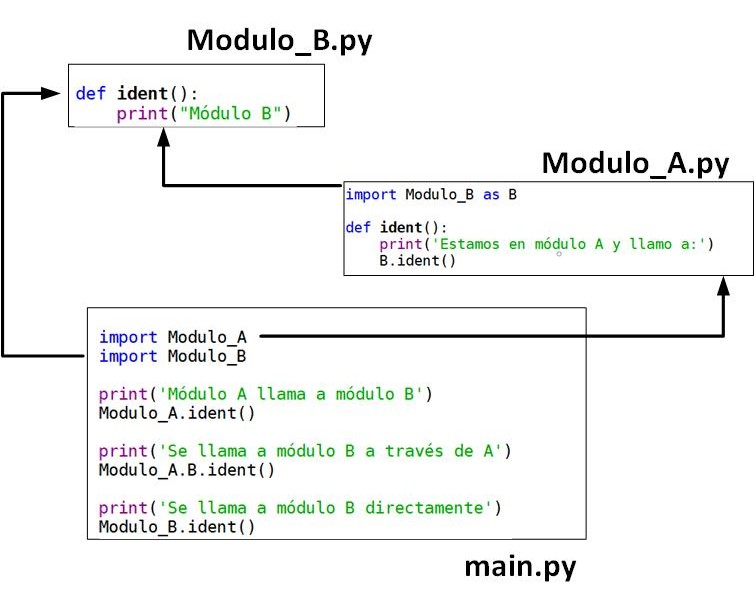

In [ ]:
import Modulo_A
import Modulo_B

print('Módulo A llama a módulo B')
Modulo_A.ident()

print('Se llama a módulo B a través de A')
Modulo_A.B.ident()

print('Se llama a módulo B directamente')
Modulo_B.ident()

Cuando un módulo es importando mediante la ejecución de las sentencias: 

```python 
import nombre_modulo1   ó
import nombre_modulo2 as nom
```
Los diferentes objetos definidos con **alcance global** en el módulo son *_incorporados_* como **atributos** y **métodos** a los espacios de nombres de los respectivos módulos, accesibles mediante el operador ```nombre_modulo1.``` seguido por el nombre del la atributo o la invocación del método, para el primer caso. La segunda variante especifíca un *alias* (nom) en el ejemplo, lo que permitiría utilizar ```nom.``` para el segundo caso.

Existe otra forma de importar módulos, tal vez más comoda para _scripts_ de poca complejidad, pero que no respeta el concepto de **espacio de nombres**: 

```python 
from nombre_modulo1 import *  
from nombre_modulo2 import obj1, obj2
```
Esta forma de importar, hace que los valores y funciones importadas se **incorporen** al espacio de nombres global del *script* que realiza la importación. Ahora no se antepone el **cualificador** con el nombre del modulo y el operador ```.``` como el caso previo, pero a costa de **contaminar** el **espacio de nombres** común.

La primera opción **importa** todos los objetos del módulo ```nombre_modulo1``` mientras que la segunda opción, que resultaría preferible, **importa** solamente los nombres ```obj1``` y ```obj2``` desde elmmodulo ```nombre_modulo2``` resultando en una **contaminación** más limitada.

In [ ]:
from Modulo_A import *
from Modulo_B import *

ident()

***
<a id='Importación'></a>

## Funcionamiento de la importación de un módulo

El proceso de importación de un módulo implica por parte de Python los siguiente pasos:
1. Localizar el módulo en el sistema de ficheros.
2. Si el código está escrito en Python, convertirlo a *byte code*. Puedes existir módulos compilados desarrolados en otros lenguajes (C, por ejemplo).
3. Ejecutar el módulo. La ejecución de la definición de funciones consiste en crear los **objetos** función respectivos.

### Localización del módulo

Durante la importación, el módulo nombrado en la sentencia ```import``` es buscado, por orden, en los siguientes lugares:

1. El propio directorio dónde se encuentra el programa que hace la importación. Esto se utiliza por módulos creados por el propio programador como parte de un programa relativamente pequeño.
2. Directorios o carpetas recogidos en la variable de configuración de Python llamada PYTHONPATH. Se puede acceder desde IDEs como Spyder.
3. Desde los directorios designados por Python durante la instalación, para albergar los módulos de la **biblioteca estándar**.
4. Lo especificado en ficheros con extensión ```.pth``` si estuvieran presentes (no lo veremos en el curso).

***
<a id='Ejemplo'></a>

## Ejemplo de módulo

A modo de ejemplo, vamos a crear un módulo **polinomios**, que _"exporte"_ un conjunto de funciones que permitan realizar algunas operaciones básicas con polinomios. Los polinomios serán descritos por **listas** de números reales que representan sus coeficientes en orden decreciente de las potencias de x. 

El siguiente polinomio de orden ```3```:

$$
p\left(x\right) =a_3x^3 + a_2.x^{2}+ a_1.x + a_0.
$$

Sería representado por una lista de Python de ```4``` elementos, representandos conteniendo los coeficientes.

```python
[a_3, a_2, a_1, a_0]
```

En general, para polinomios de orden **n**, será necesario utilizar listas de ```n+1``` elementos.

$$
p\left(x\right) =a_nx^n + a_{n-1}.x^{n-1}+ ...+ a_2x^2 + a_1.x + a_0.
$$

El diseño del módulo requerirá el analizar el campo de aplicación de que se trate y el elegir un conjunto de objetos,  funciones en este caso, que sea generales, cohesivas y con interfaces bien definidas. 

Para nuestro ejemplo de modulo, definiremos las siguientes funciones iniciales:

- ```polyval(pol,x)```: Evalúa la el polinomio en ```x```y devuelve un número real.
- ```conv(pol1,pol2)```: Devuelve un polinomio que se la multiplicación ("convolución") de los polinomios pol1,pol2.
- ```polyder(pol)```: Devuelve la derivada del polinomio que se pasa como argumento.
- ```polyint(pol)```: Devuelve la integral del polinomio que se pasa como argumento.


En el fichero ```polinomios.py``` que colocaremos en el mismo directorio del programa que va a importarlo, se definirán las funciones anteriormente mencionadas.
Nótese que para el caso de este ```notebook``` el fichero que implementa el módulo se encuentra en el misma carpeta en la que se encuentra nuestro **cuaderno**.
La siguiente celda muestra la definición de una de las funciones incluidas en ```polinomios.py```. 
El fichero completo puede ser accedido a través de este [enlace](./polinomios.py).

In [ ]:
def polyder(pol):
    '''
    
    DEVUELVE EL POLINOMIO DERIVADA
    Parameters
    ----------
    pol : LISTA
        POLINOMIO A DERIVAR.

    Returns
    -------
    LISTA CON COEFICIENTES DEL POLINOMIO DERIVADA.
    
    '''
    
    der = list(pol)
    der.pop()
    orden = len(der)
    for i, a in enumerate(der):
        der[i] *= orden - i
    return der

- **Documentación**: es buena práctica incluir inmediatamente después del **encabezado**, una cadena de carácteres (típicamente utilizando triple comillas para que pueda ser definida en múltiples líneas) que describe sucintamente la función: lo que hace, sus parámetros de entrada y de salida. Se denomina como *docstring*. La función nativa help() cuando es llamada con el nombre de una función, imprime pos consola el _docstring_ si lo hubiera.

Nótese en el código anterior el uso del **_docstring_** que describe el objetivo de la función así como el parámetro de entrada y lo que se devuelve mediante ```return```. En este caso se trata de recibir la lista que da cuenta de los coeficientes del polinomio que se desea derivar simbólicamente, para devolver otra lista con los coeficientes del polinomio que representa la derivada.

El uso de la documentación provista por el **_docstring_** es siempre recomendable, pero lo es aún más a la hora de crear módulos con la inteción de ser utilizados en diferente proyectos. La existencia del **_docstring_** permite utilizar desde el intérprete la función ```help()``` por ejemplo.

In [4]:
import polinomios as pol

help(pol.polyder)

print(pol.polyder([2, 1, 1]))

Help on function polyder in module polinomios:

polyder(pol)
    DEVUELVE EL POLINOMIO DERIVADA
    Parameters
    ----------
    pol : LISTA
        POLINOMIO A DERIVAR.
    
    Returns
    -------
    LISTA CON COEFICIENTES DEL POLINOMIO DERIVADA.

[4, 1]


In [ ]:
import polinomios

print(polinomios.polyder([2, 1, 1]))

***
<a id='Diferencias'></a>

## Programa vs. módulo

¿Existen diferencias fundamentales entre un módulo y el guión de un programa?

Desde el punto de vista de la sintaxis del Python **no hay diferencia alguna**. La diferencia la impone el _uso_ que se le otorga a uno y otro.

**Módulo**: Contiene la colección de valores o funciones, más o menos programadas de forma general, que serán utilizados por programas finales que implementan la lógica de una aplicación específica, pero que también puede ser utilizados por otros **modulos**.
**programa** o **_script_**: El código de Pyhton que implementa la lógica que nos interesa en una aplicación particular y que puede o no **importar** otros módulos.

Ahora bien, si el **programa** en cuestión definiera funciones lo suficientemente generales como para se utilizados por otros programas, el mismo podría ser a su vez importado, y utilizado como módulo, si se toman algunas precauciones.

Específicamente, se considera como **script** el código de Python que es **ejecutado** **_directamente_** desde el intérprete de Python, como el programa de **"nivel superior"** que puede o no importar módulos. Para cada fichero con código ejecutable de Python existe una variables global predefinida por el sistemas, , llamada ```__name__``` que tendrá un valor u otro, en dependencia de si se trata del programa de "nivel superior" o de un módulo que ha sido importado.

Variable ```__name__``` contiene:

- Cadena: ```"__main__"``` si el código ha sido invocado por el sistema como programa de **nivel superior**.

- Cadena que específica el nombre del módulo, si ha sido importado con alguna de las variantes descritas.


In [1]:
#Fichero: program_principal.py

import Modulo_A_name as mod


mod.ident()


print('Variable __name__ en prog. principal:', __name__)

Variable __name__ en Mod. A: Modulo_A_name
Función ident en módulo A
Variable __name__ en prog. principal: __main__


In [2]:
#Fichero: Modulo_A_name.py

def ident():
    print('Función ident en módulo A')
   
print('Variable __name__ en Mod. A:', __name__)

Variable __name__ en Mod. A: __main__


Observe en las dos celdas anteriores, un ejemplo elemental que muestra lo que ocurre. 

La primera celda representa el programa principal y se encontraría almacenada en un fichero "programa_principal.py".

La segunda celda muestra el contenido del módulo llamado **Modulo_A_name** que se encuentra el fichero "modulo_A_name.py".

Observe que en ambos ficheros existe una línea ejecutable declarada a nivel global que saca por pantalla el valor de la variable ```__name__```.

Al ejecutar la primera celda, ocurre los siguiente:
- El programa de **nivel superior** es el programa que se ejecuta directamente, y que se muestra en la prmera celda.
- Se ejecuta la línea ```import Modulo_A_name as mod``` que ejecuta le fichero "modulo_A_name.py" (que se encuentra en el directorio de este cuaderno) y cuyo contenido es mostrado en la segunda celda.
- La ejecución del módulo implica la definición de la función ```ident()``` que crea el objeto correspondiente, y la ejecución de la sentencia ```print``` mostrada en la segunda celda. Como resultado de esta ejecución, sabemos que la variable ```__name__``` del módulo tiene el valor ```Modulo_A_name```, o sea, el nombre del módulo.
- Continúa la ejecución del programa principal, se ejecuta la función del módulo: ```mod.ident()``` y luego se imprime la varibles ```__name__``` desde el programa principal y aquí el valor de la misma es la cadena de caracteres ```"__main__"```.

Al ejecutar la segunda celda:
- Se ejecuta la definición de la función ```ident()``` que crea el objeto función.
- Se ejecuta la sentencia que aparece declarada de forma global y que llama a la función ```print()``` para sacar el valor de variable ```__name__``` y comprobámos que también en este caso, contiene la cadena ```"__main__"```.

En resumen, se puede sacar la conclusión de que el valor de ```__name__``` va a depender de si el código ha sido invocado directamente o indirectamente como parte del mecanismo de importación de módulos.


In [5]:
#Fichero: program_principal.py

def intro():
    print("Funciones locales son definidas en cualquier caso")

if __name__ == "__main__":
     
    #Sentencias que conforman el programa se ejecutan sólo si el mismo ha sido
    #llamado directamente
    
     print('Variable __name__ en prog. principal:', __name__)
     intro()

Variable __name__ en prog. principal: __main__
Funciones locales son definidas en cualquier caso


Teneniendo en cuenta lo discutido, muchos programadores de Python utilizan la construcción condicional que se muestra en la celda anterior para ejecutar las sentencias definidas a nivel global (fuera de las funciones) sólo en el caso de que el fichero haya sido ejecutado directamente como programa de "nivel superior". 

Las funciones son definidas, típicamente, fuera del condicional. Esto abre la puerta a que nuestro código pueda ser utilizado como si fuera un módulo, por otros programas, en el caso de que las definiciones de las funciones fueran lo suficientemente generales y útiles para los mismos. En este caso el código dentro del condicional no se ejecutaria porque ```__name__``` no contendría ```"__main__"```, sino el nombre del fichero .py que contiene el código.

Otra aplicación de esta construcción la tenemos en los **unit tests** como se comenta en la siguiente sección.

***
<a id='Unit_tests'></a>

## Test de unidades (Unit tests)

Una **buena práctica de programación**, exige que comprobemos que el funcionamiento de nuestro código es el correcto, realizando _**"tests"**_ que nos permitan asegurar, por ejemplo, que las **funciones** diseñadas cumplan con todos los requerimientos, y funcionen de forma correcta para todos los casos, incluidos los casos límite.

Si bien estos  _**"tests"**_ son siempre necesarios, lo son aún más en el caso de los módulos que se supone contienen **funciones** y otros objetos programados de forma general, para formar parte de _bibliotecas_ que van a ser utilizadas, una y otra vez, conformando diferentes programas. Un error en un función de este tipo de módulos compromete la fiabilidad de todos los programas que la utilizan.

Se recomienda entonces, que junto con el código de cada función, se diseñe e implemente también el código de aquellas llamadas a funciones que realizan los "tests" sobre esa función.

El mecanismo que ofrece la variable o atributo ```__name__``` para chequear mediante una sentencia condicional si un fichero fuente (.py) ha sido  ejecutado directamente o no, resulta muy apropiado para programar estos **Test unitarios** (**_Unit Tests**).

In [6]:
"""
Funciones para trabajar con polinomios
"""
def polyval(pol,x):
  
    y = 0
    for i, a in enumerate(pol):
        y += a*x**i
    return y

def polyder(pol):
    
    der = list(pol)
    der.pop()
    orden = len(der)
    for i, a in enumerate(der):
        der[i] *= orden - i
    return der

def conv(pol1,pol2):
    
    orden1, orden2 = len(pol1) -1, len(pol2) - 1
    if orden1 < 0 or orden2 < 0:
        producto = None
    else:
        orden = orden1 + orden2
        producto = [0]*(orden + 1)
        for i, elem1 in enumerate(pol1):
            for j, elem2 in enumerate(pol2):
                producto[i + j] += elem1*elem2
    return producto
            
                  
if __name__ == "__main__":
    pol = [5, 2, 1,0]
    der = polyder(pol)
    print('Polinomio {} evaluado en 1.0 da {}'.format(pol,polyval(pol,1)))
    print('derivada ', pol,der)
    print('convolución de {}*{} es {} '.format( pol, der, conv(pol,der)))

Polinomio [5, 2, 1, 0] evaluado en 1.0 da 8
derivada  [5, 2, 1, 0] [15, 4, 1]
convolución de [5, 2, 1, 0]*[15, 4, 1] es [75, 50, 28, 6, 1, 0] 


En la celda anterior se muestra un fragmento del módulo **polinomios** que previamente ha sido introducido. 

Observe que aparecen definiciones de las funciones ```conv()```, ```polyder()``` y ```polyval()``` para determinar la convolución (producto), la derivada y para evaluar un polinomio en un punto, respectivamente

La definición de estas funciones es el próposito fundamental de la existencia del módulo. En el caso de que el mismo sea importado por un _script_ u otro módulo, el código de estas definiciones sería ejecutado para crear los respectivos objetos. Sin embargo, en ese caso, como ```__name__``` tendría un valor diferente de ```"__main__"``` el código en el cuerpo del **if** no se ejecutaría.

Sin embargo, cuando el fichero que implementa el módulo es ejecutado directamente, entonces si se cumpliría la condición del **if** con lo cuál sería ejecutadas las llamadas a las funciones previamente definidas en el módulo, ofreciendo de esta forma la oportunidad ideal, para programar en este punto una serie de llamadas a las funciones del módulo, que sirva como **tests unitarios**, que demuestren, mediante ejemplos, la _corrección_ de las mismas.

***
<a id='Biblioteca'></a>

## Biblioteca estándar

Python ofrecen multitud de módulos en la biblioteca estándar, convenientemente clasificados por temática. En el siguiente enlace a la página web oficial del lenguaje, se ofrece una descripción completa de los mismos. 

[Enlace a descripción biblioteca estándar](https://docs.python.org/3/library/)

De especial interés se tienen los siguientes:

- **math**, **cmath**: funciones matemáticas reales y complejas
- **random**: generación de números pseudo-aleatorios
- **os**: para utilizar servicios del Sistema Operativo
- **time**: acceso al tiempo y funciones relativas la calendario
- **csv**, **json**, **xml**, **html**: para leer y escribir ficheros en diferentes formatos (csv, json, xml, html)
- **tkinter**: implementación de interfaces gráficas con el usuario
- **pydoc**, **doctest**: para generar y "testear" automáticamente documentación de programas python
- **timeit**: para medir el tiempo de ejecución de fragmentos de código
- **sys**: acceso a funciones que interaccionan con el intérprete

Entre muchas otras.

En el curso ya hemos utilizado funciones del módulo **math** y **cmath**. En futuras lecciones, y de forma transversal, se verán otras funciones de interés proveniente de otros módulos.

## Paquetes (_Packages_)

A diferencia de los módulos, que están consituidos simplemente por un fichero con las funciones y clases que se exportan, los paquetes (_packages_) están compuestos por un conjuntos de ficheros .py que están organizados en un árbol de sub-directorios o carpetas en el disco duro del ordenador.

Los **paquetes** entonces imponen una determinada jerarquía a las objetos exportados, y constituyen el formato adecuado para distribuir librerías complejas.

Cada uno de los sub-directorios que conforman el **paquete** constituye un espacio de nombres (_**namesapace**_) concreto.

En cada uno de los directorios que contienen el **paquete**, debe existir un fichero de Python llamdado **__init__.py** con código que se ejecutará cuando se importe el espacio de nombres definido en dicho sub-directorio.

En este curso, no profundizaremos mucho más en este concepto. Simplemente mencionar su existencia, y comentar que mucho software disponible escrito para Python es ditribuido en forma de estos **paquetes**.